# Datenanalyse

In [14]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io
import tqdm

metadata_file_path = "./metadata/pokemon.csv"
base_folder = "../../../pokemonData/pokemonDataset/"

pokemon_dir_names = [pokemon.split("\\")[1] for pokemon in glob.glob(base_folder+"*")]
df = pd.read_csv(metadata_file_path)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# Verteilung - Primärtyp als Label

In [15]:
pokedex = df.loc[:,['name', 'type1', "type2"]].to_numpy()
pokedex_dict = {}
for pokemon in pokedex:
    pokedex_dict[pokemon[0]] = pokemon[1]

element_count_dict = {}
elements = np.unique([pokemon[1] for pokemon in pokedex])
for element in elements:
    element_count_dict[element] = 0

In [5]:
for pokemon in pokemon_dir_names:
    if pokemon in pokedex_dict:
        key = pokedex_dict[pokemon]
        length = len(glob.glob(base_folder+pokemon+"/*"))
        element_count_dict[key] += length
    else:
        print(pokemon)

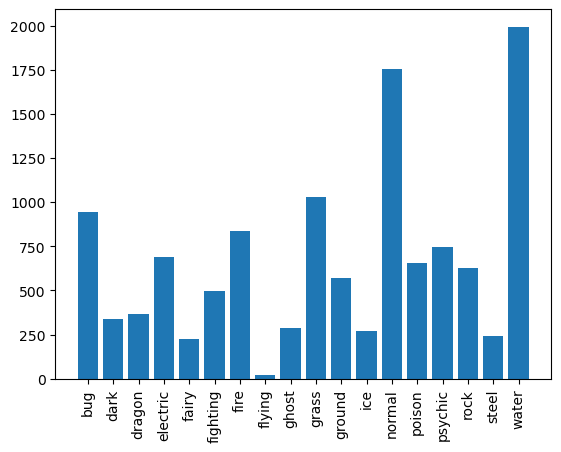

In [6]:
plt.bar(range(len(element_count_dict)), list(element_count_dict.values()), align='center')
plt.xticks(range(len(element_count_dict)), list(element_count_dict.keys()), rotation='vertical')
plt.show()

# Verteilung - Primär- und Sekundartyp als Label

In [17]:

pokedex_both = df.loc[:,['name', 'type1', "type2"]].to_numpy()
pokedex_both_dict = {}
for pokemon in pokedex_both:
    pokedex_both_dict[pokemon[0]] = [pokemon[1]]
    if not pd.isnull(pokemon[2]):
        pokedex_both_dict[pokemon[0]].append(pokemon[2])

element_count_both_dict = {}
elements = np.unique([pokemon[1] for pokemon in pokedex_both])
for element in elements:
    element_count_both_dict[element] = 0

In [18]:
for pokemon in pokemon_dir_names:
    if pokemon in pokedex_both_dict:
        keys = pokedex_both_dict[pokemon]
        length = len(glob.glob(base_folder+pokemon+"/*"))
        for key in keys:
            element_count_both_dict[key] += length
    else:
        print(pokemon)

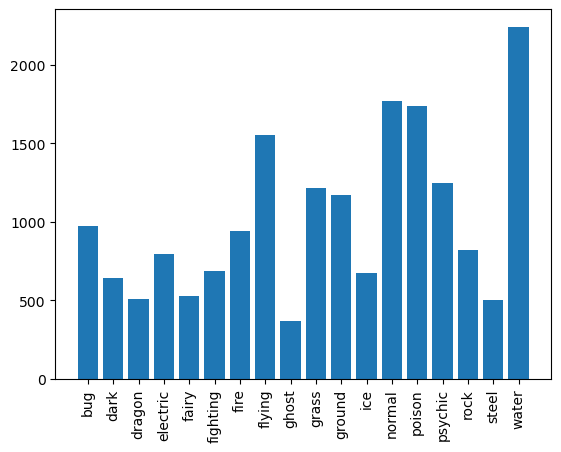

In [19]:
plt.bar(range(len(element_count_both_dict)), list(element_count_both_dict.values()), align='center')
plt.xticks(range(len(element_count_both_dict)), list(element_count_both_dict.keys()), rotation='vertical')
plt.show()

# Farbverteilung - Primärtyp als Label

In [9]:
element_count_average_dict = {}
elements = np.unique([pokemon[1] for pokemon in pokedex])
for element in elements:
    element_count_average_dict[element] = []

for idx, pokemon in enumerate(tqdm.tqdm(pokemon_dir_names)):
    if pokemon in pokedex_both_dict:
        key = pokedex_dict[pokemon]
        png_list = glob.glob(base_folder+pokemon+"/*.png")
        jpg_list = glob.glob(base_folder+pokemon+"/*.jpg")
        jpeg_list = glob.glob(base_folder+pokemon+"/*.jpeg")
        for image in png_list + jpg_list + jpeg_list:
            img = io.imread(image)
            average = img.mean(axis=0).mean(axis=0)
            average = average[:3]
            element_count_average_dict[key].append(average)
 

100%|██████████| 705/705 [03:42<00:00,  3.17it/s]


In [10]:
for key in element_count_average_dict:
    element_count_average_dict[key] = np.mean(element_count_average_dict[key], axis=0)

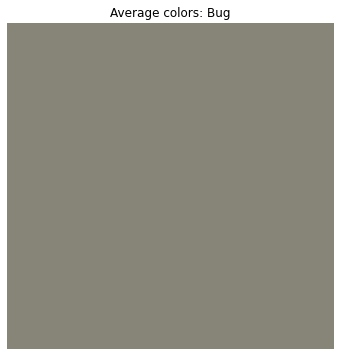

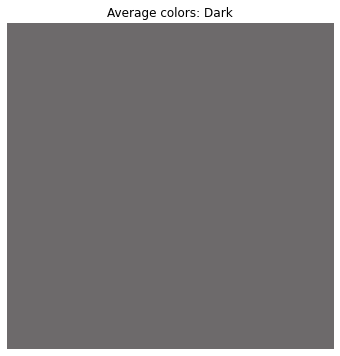

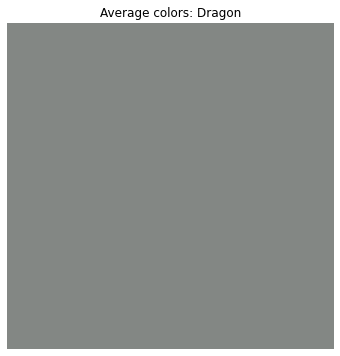

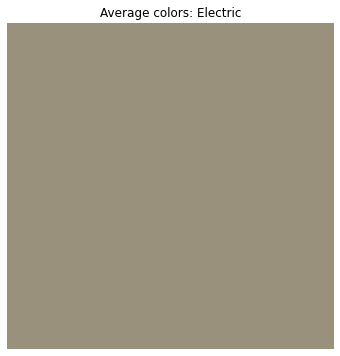

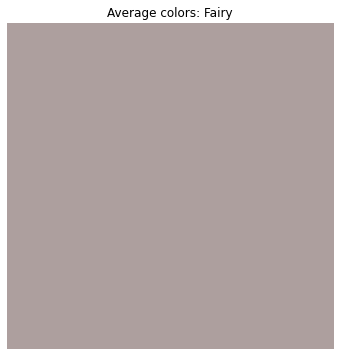

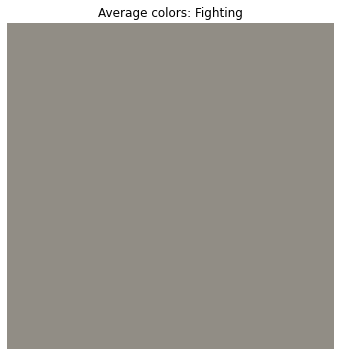

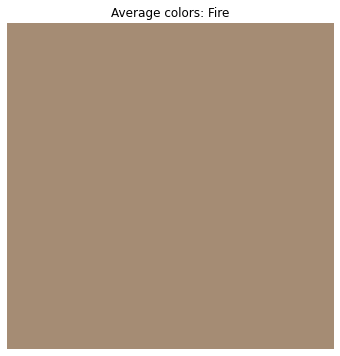

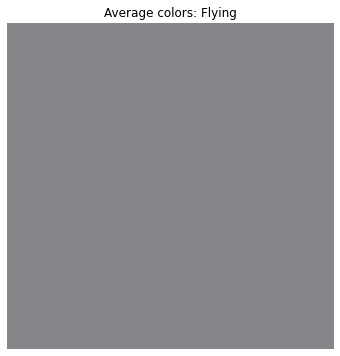

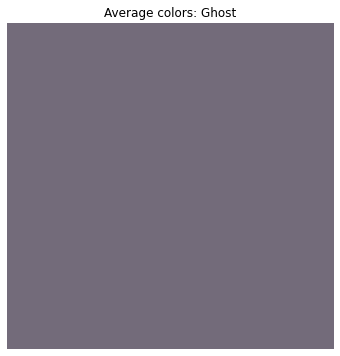

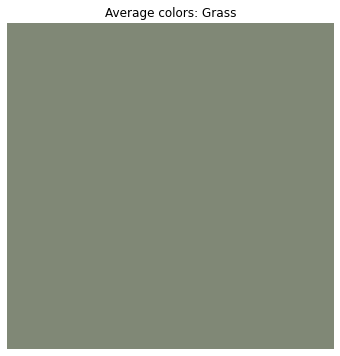

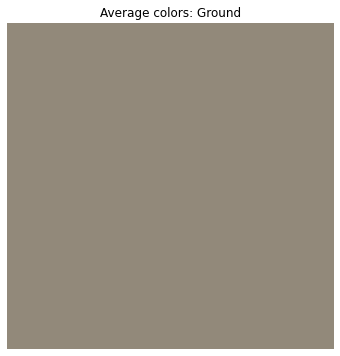

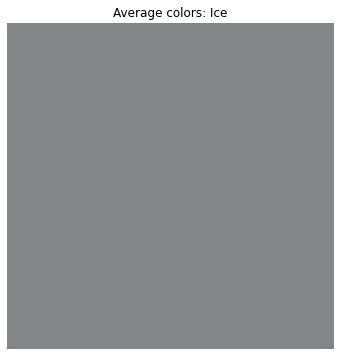

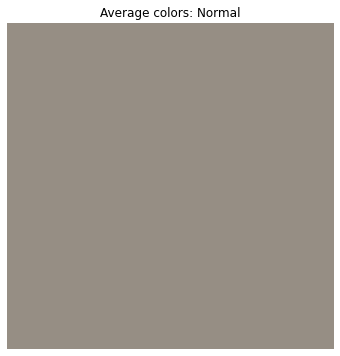

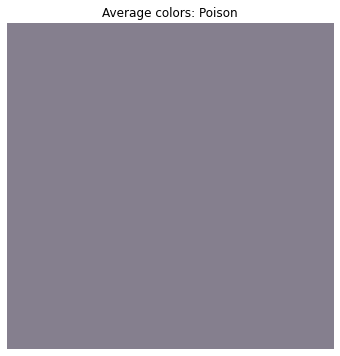

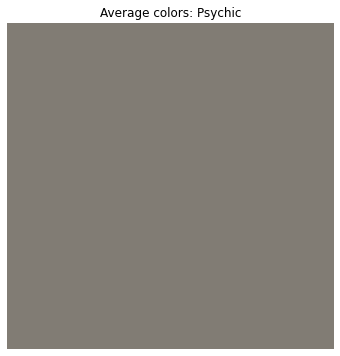

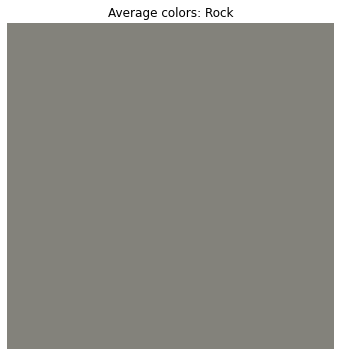

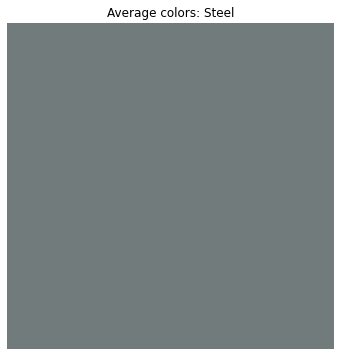

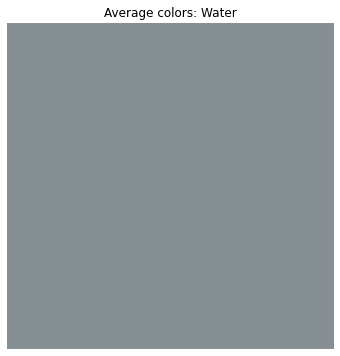

In [11]:
for pokemon in element_count_average_dict:
    fig, (ax1) = plt.subplots(1, 1, figsize=(12,6))
    avg_patch = np.ones(shape=(25,25,3), dtype=np.uint8) * np.uint8(element_count_average_dict[pokemon])
    ax1.imshow(avg_patch)
    ax1.set_title(f'Average colors: {pokemon}')
    ax1.axis('off')
    plt.show(fig)